In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [64]:
df=pd.read_csv('data/product_info.csv')

- **product_id**: The unique identifier for the product from the site
- **product_name**: The full name of the product
- **brand_id**: The unique identifier for the product brand from the site
- **brand_name**: The full name of the product brand
- **loves_count**: The number of people who have marked this product as a favorite
- **rating**: The average rating of the product based on user reviews
- **reviews**: The number of user reviews for the product
- **size**: The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type
- **variation_type**: The type of variation parameter for the product (e.g. Size, Color)
- **variation_value**: The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)
- **variation_desc**: A description of the variation parameter for the product (e.g. tone for fairest skin)
- **ingredients**: A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’]
- **price_usd**: The price of the product in US dollars
- **value_price_usd**: The potential cost savings of the product, presented on the site next to the regular price
- **sale_price_usd**: The sale price of the product in US dollars
- **limited_edition**: Indicates whether the product is a limited edition or not (1-true, 0-false)
- **new**: Indicates whether the product is new or not (1-true, 0-false)
- **online_only**: Indicates whether the product is only sold online or not (1-true, 0-false)
- **out_of_stock**: Indicates whether the product is currently out of stock or not (1 if true, 0 if false)
- **sephora_exclusive**: Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)
- **highlights**: A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])
- **primary_category**: First category in the breadcrumb section
- **secondary_category**: Second category in the breadcrumb section
- **tertiary_category**: Third category in the breadcrumb section
- **child_count**: The number of variations of the product available
- **child_max_price**: The highest price among the variations of the product
- **child_min_price**: The lowest price among the variations of the product


In [65]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [66]:
df.brand_id=df.brand_id.astype(str)

In [67]:
df.describe()

,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [68]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]
percentageOfnull(df)

,Null Count,Null Percentage,DataTypes
sale_price_usd,8224,97.0,float64
value_price_usd,8043,95.0,float64
variation_desc,7244,85.0,object
child_max_price,5740,68.0,float64
child_min_price,5740,68.0,float64
highlights,2207,26.0,object
size,1631,19.0,object
variation_value,1598,19.0,object
variation_type,1444,17.0,object
tertiary_category,990,12.0,object


In [87]:
df['size_oz'].value_counts()

size_oz
1.700    698
1.000    662
3.400    323
0.500    286
5.000    224
        ... 
0.192      1
4.470      1
7.020      1
0.870      1
1.040      1
Name: count, Length: 371, dtype: int64

In [90]:
unique_sizes = df['size'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'size':")
for size in unique_sizes:
    print(size)

Valores únicos en la columna 'size':
nan
3.4 oz/ 100 mL
0.25 oz/ 7.5 mL
6 oz / 180 mL
1 oz / 30 mL
1.7 oz / 50 mL
0.33 oz / 10 mL eau de parfum spray
0.34 oz / 10 mL eau de parfum spray
0.27 oz / 8 mL
5 x 0.16oz/5mL
1 oz/ 30 mL
1oz/30mL
3.4 oz/ 101 mL
0.7 oz/ 20 mL
1.7 oz/ 50 mL
6 oz/ 180 mL
2.5 oz/ 75 mL
7 oz/ 200 g
180 mL
16 oz/ 453 g
16 oz/ 453 mg
14 oz/ 414 mL
6.8 oz / 200 mL
7.2 oz/ 213 mL
2 oz/ 60 mL
3.3 oz/ 94 g
0.34 oz/ 10 mL
0.27 oz/ 8 mL
1.7oz/50mL
0.23 oz/ 7 mL
1 oz  / 30 mL
.5 oz / 15 mL
1 oz
5 oz/ 150 mL
4 oz/ 120 mL
1.35 oz/ 40 mL
0.5 oz/ 15 mL
1.5 oz/ 45 mL
0.21 oz/ 6.2 mL
3.38 oz/ 100 mL
0.85 oz/ 25 mL
6.25 oz/ 185 mL
0.51 oz/ 15 mL
1.69 oz/ 50 mL
0.5 oz/ 14 mL
3.9 oz / 115 mL
4.0 oz/ 118 mL
.35 oz/ 10 mL
4 oz / 118 mL
.5 oz/ 15 mL
0.5 oz / 15 mL
8.5 oz/ 250 mL
16.5 oz/ 488 mL
4.8 oz/ 142 mL
7.4 oz/ 212 g
5.1 oz/ 150 mL
5.1 oz/ 145 g
4.2 oz/ 125 mL
8.5 oz/ 251 mL
5 oz/ 147 mL
5.7 oz/ 169 mL
8.2 oz/ 232 g
8.5 oz/  250 mL
6.5 oz/ 184g
16.5 oz/ 487 mL
8.5 oz/ 240g
6.7 oz/ 

In [86]:
import pandas as pd
import re

# Definir una función para extraer el primer número
def extract_first_number(text):
    # Usar una expresión regular para encontrar el primer número
    match = re.search(r'\d+(\.\d+)?', str(text))
    if match:
        return float(match.group())
    return None

# Aplicar la función a la columna 'size' para obtener 'size_oz'
df['size_oz'] = df['size'].apply(extract_first_number)

# Mostrar el resultado
print(df[['size', 'size_oz']])


                size  size_oz
0                NaN      NaN
1     3.4 oz/ 100 mL      3.4
2     3.4 oz/ 100 mL      3.4
3     3.4 oz/ 100 mL      3.4
4     3.4 oz/ 100 mL      3.4
...              ...      ...
8487             NaN      NaN
8488             NaN      NaN
8489             NaN      NaN
8490    2 oz / 60 mL      2.0
8491             NaN      NaN

[8209 rows x 2 columns]


In [71]:
df.highlights.value_counts()

highlights
['Layerable Scent', 'Floral Scent']                                                                     64
['Vegan', 'Unisex/ Genderless Scent', 'Clean at Sephora', 'Cruelty-Free']                               48
['Vegan', 'Cruelty-Free']                                                                               40
['Vegan', 'Without Phthalates', 'Without Parabens', 'Without Sulfates SLS & SLES', 'Cruelty-Free']      40
['Floral Scent', 'Layerable Scent']                                                                     37
                                                                                                        ..
['Vegan', 'Natural Finish', 'Liquid Formula', 'Long-wearing', 'Medium Coverage', 'Cruelty-Free']         1
['Natural Finish', 'Without Parabens', 'Long-wearing', 'Vegan', 'Without Triclosan', 'Cruelty-Free']     1
['allure 2019 Best of Beauty Award Winner', 'Cruelty-Free', 'Vegan']                                     1
['Lengthening', 'Without P

In [72]:
null_rows = df[df['rating'].isnull() | df['reviews'].isnull() | df['secondary_category'].isnull()]
df.drop(null_rows.index, inplace=True)

In [73]:
columns_to_drop = ['sale_price_usd', 'value_price_usd', 'variation_desc', 'child_max_price', 'child_min_price']
df.drop(columns=columns_to_drop, inplace=True)

In [74]:
dup = df.duplicated().sum()
print('Number of duplicated records:', dup)

Number of duplicated records: 0


## Categorias Principales

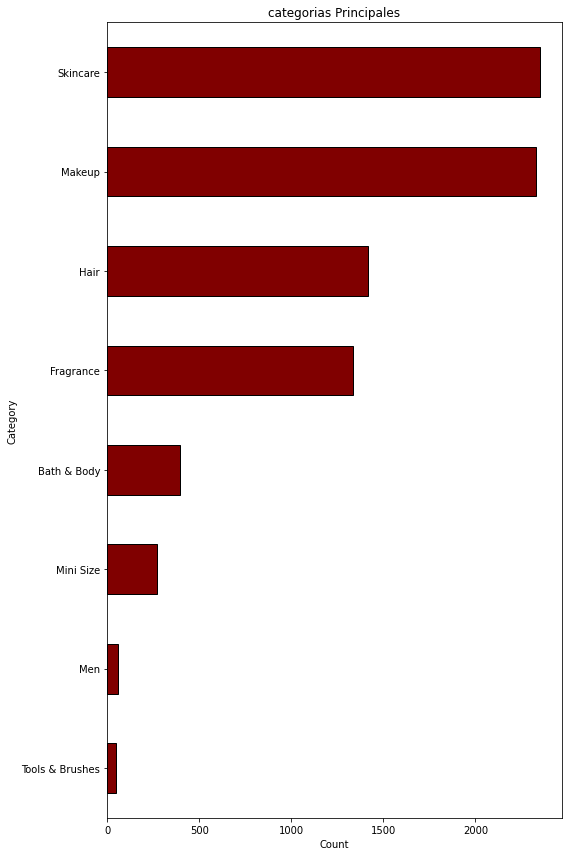

In [75]:
plt.figure(figsize=(8, 12))  # Tamaño del gráfico

# Contar las ocurrencias y graficar como barras horizontales
df['primary_category'].value_counts().plot(kind='barh', color='maroon', edgecolor='black')

plt.title('categorias Principales')  # Título del gráfico
plt.xlabel('Count')  # Etiqueta del eje x
plt.ylabel('Category')  # Etiqueta del eje y
plt.gca().invert_yaxis()  # Invertir el eje y para que las categorías más altas estén arriba
plt.tight_layout()  # Ajustar el diseño
plt.show()

## relación producto favorito y Rating

In [76]:
df.loves_count.value_counts()

loves_count
0         38
4679       5
1177       4
1695       4
1333       4
          ..
72173      1
76226      1
120381     1
118258     1
1475       1
Name: count, Length: 7291, dtype: int64

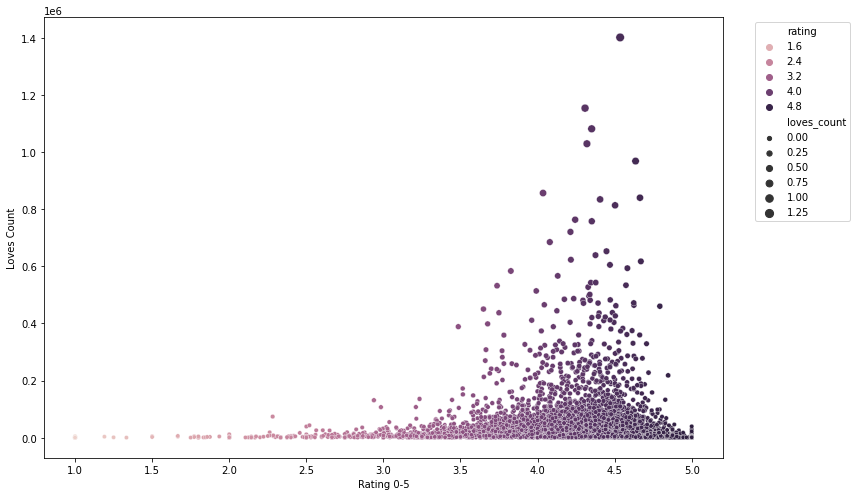

In [77]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='rating', y='loves_count', data=df, size='loves_count', hue='rating', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Loves Count')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [78]:
correlation = df['rating'].corr(df['loves_count'])
print(f"Correlation between rating and loves_count: {correlation}")

Correlation between rating and loves_count: 0.041985216896216516


In [79]:
from scipy.stats import pearsonr

# Calcular la correlación y el p-valor
correlation, p_value = pearsonr(df['rating'], df['loves_count'])

print(f"Correlation between rating and loves_count: {correlation}")
print(f"P-value: {p_value}")

# Interpretar el resultado del test de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La correlación es estadísticamente significativa.")
else:
    print("No hay suficiente evidencia para concluir que la correlación es significativa.")


Correlation between rating and loves_count: 0.041985216896216475
P-value: 0.0001417426700271605
La correlación es estadísticamente significativa.


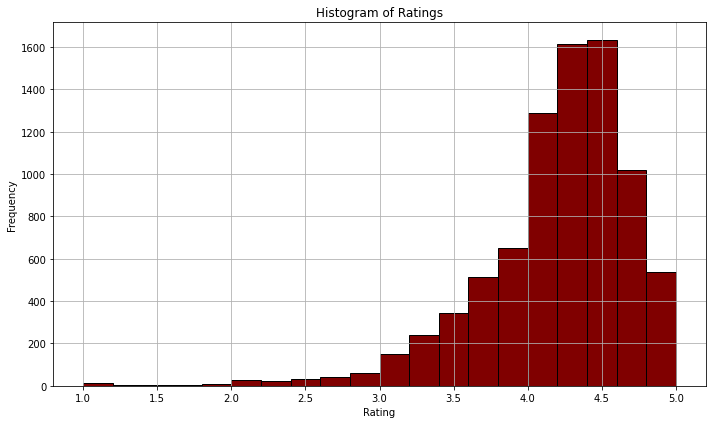

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear el histograma de rating
plt.hist(df['rating'], bins=20, color='maroon', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Mostrar el histograma
plt.grid(True)
plt.tight_layout()
plt.show()


## Nuevos productos excllusivos de Sephora

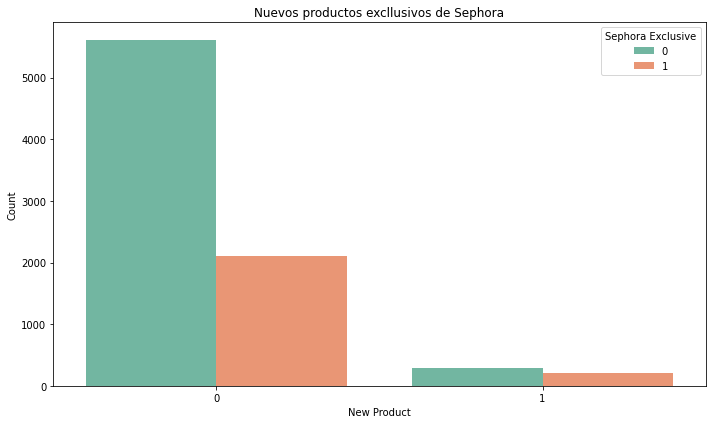

In [81]:
# Count plot de productos nuevos y exclusivos de Sephora
plt.figure(figsize=(10, 6))
sns.countplot(x='new', hue='sephora_exclusive', data=df, palette='Set2')
plt.xlabel('New Product')
plt.ylabel('Count')
plt.title('Nuevos productos excllusivos de Sephora')
plt.legend(title='Sephora Exclusive', loc='upper right')
plt.tight_layout()
plt.show()



## Productos Excluisivos online

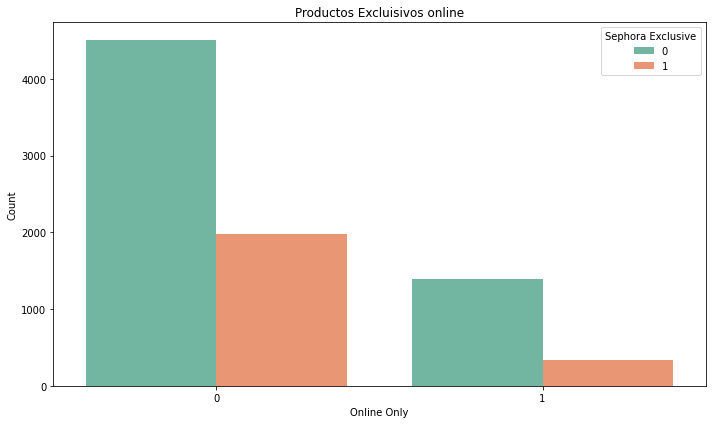

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='online_only', hue='sephora_exclusive', data=df, palette='Set2')
plt.xlabel('Online Only')
plt.ylabel('Count')
plt.title('Productos Excluisivos online')
plt.legend(title='Sephora Exclusive', loc='upper right')
plt.tight_layout()
plt.show()

## Ingredientes

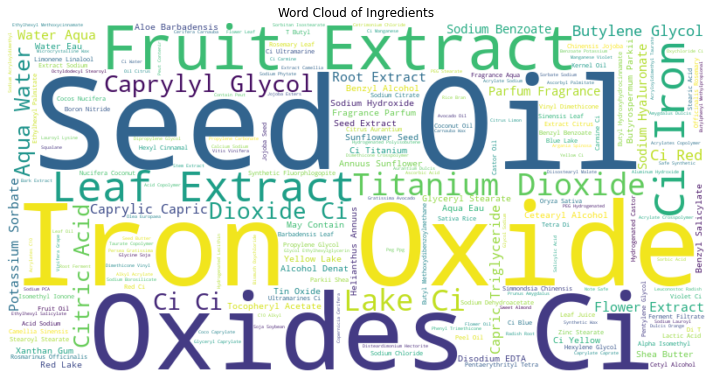

In [83]:
from wordcloud import WordCloud

ingredients_text = ' '.join(df['ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.tight_layout()
plt.show()

## Analisi de Precios y Rating de marcas de Lujo

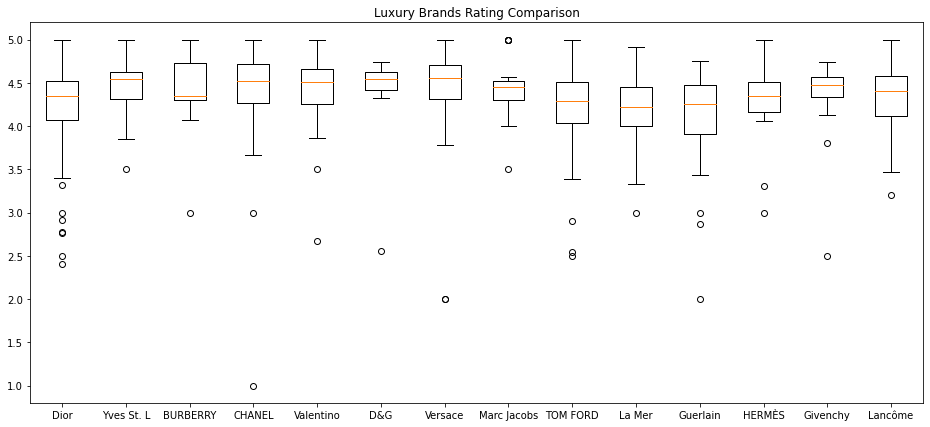

In [84]:
dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')


chanel = ch['rating'].dropna()
dior = dr['rating'].dropna()
ystl = ysl['rating'].dropna()
burrberry = br['rating'].dropna()
valentino = vt['rating'].dropna()
versace = vs['rating'].dropna()
dgb = dg['rating'].dropna()
mjb = mj['rating'].dropna()
tomford = tf['rating'].dropna()
guerlain = gr['rating'].dropna()
lamer = lm['rating'].dropna()
hermes = hm['rating'].dropna()
givenchy = gv['rating'].dropna()
lancome = lc['rating'].dropna()


labels = ['Dior', 'Yves St. L', 'BURBERRY', 'CHANEL', 'Valentino', 'D&G', 'Versace', 'Marc Jacobs', 'TOM FORD', 'La Mer', 'Guerlain', 'HERMÈS', 'Givenchy', 'Lancôme']

plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Rating Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)


plt.show()

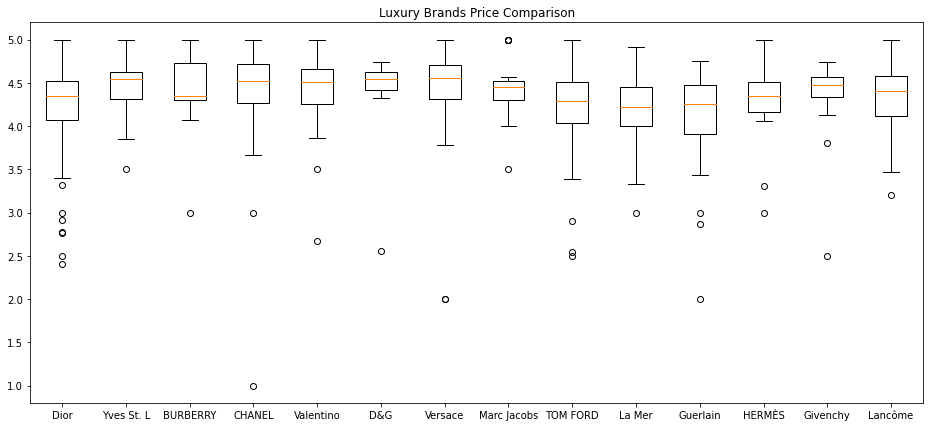

In [85]:

plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Price Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)


plt.show()